In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import geopandas as gpd

import geoplot as gplt
import geoplot.crs as gcrs
import contextily as cx

sns.set(font='Arial')



PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\mmak\\AppData\\Local\\Temp\\tmphfhtohwj'

In [2]:
ct = gpd.read_file(r"../geo/lct_000b16a_e.zip")
cal_ct = ct[ct['CMANAME']=='Calgary']

NameError: name 'gpd' is not defined

In [ ]:
starts_ct_ann=pd.read_csv('./Annual/starts_ct_type.csv')

In [ ]:
starts_ct_ann=starts_ct_ann[starts_ct_ann['metro']=='CALGARY']

In [ ]:
starts_ct_ann['full_ct']=starts_ct_ann['full_ct'].map('{:.2f}'.format)
starts_ct_ann['full_ct']=starts_ct_ann['full_ct'].astype(str)

In [ ]:
cal_ct

,CTUID,CTNAME,PRUID,PRNAME,CMAUID,CMAPUID,CMANAME,CMATYPE,geometry
521,8250204.03,0204.03,48,Alberta,825,48825,Calgary,B,"POLYGON ((4721866.774 1923999.814, 4721366.451..."
565,8250201.01,0201.01,48,Alberta,825,48825,Calgary,B,"POLYGON ((4681607.283 1950607.369, 4681725.897..."
574,8250201.02,0201.02,48,Alberta,825,48825,Calgary,B,"POLYGON ((4666222.751 1976893.989, 4666543.574..."
576,8250200.03,0200.03,48,Alberta,825,48825,Calgary,B,"POLYGON ((4653424.837 1948201.417, 4653641.457..."
577,8250204.01,0204.01,48,Alberta,825,48825,Calgary,B,"POLYGON ((4710210.854 1899299.514, 4710469.103..."
...,...,...,...,...,...,...,...,...,...
5580,8250001.29,0001.29,48,Alberta,825,48825,Calgary,B,"POLYGON ((4679927.134 1909070.640, 4679982.283..."
5598,8250076.09,0076.09,48,Alberta,825,48825,Calgary,B,"POLYGON ((4689528.946 1930653.354, 4689505.157..."
5599,8250076.12,0076.12,48,Alberta,825,48825,Calgary,B,"POLYGON ((4689957.211 1933804.917, 4690002.617..."
5600,8250076.13,0076.13,48,Alberta,825,48825,Calgary,B,"POLYGON ((4686841.946 1937701.051, 4686829.877..."


In [ ]:
starts_metro_type = pd.read_csv('./Annual/starts_metro_type.csv')

In [ ]:
starts_metro_type=starts_metro_type[starts_metro_type['metro']=='CALGARY']

In [ ]:
starts_metro_type

,ref_yy,metcode,dweltype,mkttycd,date_pbi,metro,total_starts,starts_no_accsuite,starts_accsuite,num_structures,...,tot_units,total_avg_unitsize_sqm,total_avg_unitsize_sqft,total_avg_price,total_min_price,total_max_price,reference_period_qq,ref_qq,population,starts_per_10kpop
1,1988,140,4,1,"December 31, 1988",CALGARY,21,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,1988-4,4,724449.865,0.289875
23,1988,140,2,2,"December 31, 1988",CALGARY,2,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1988-4,4,724449.865,0.027607
27,1988,140,1,0,"June 30, 1988",CALGARY,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1988-4,4,724449.865,0.013804
50,1988,140,2,1,"December 31, 1988",CALGARY,312,NaN,NaN,156,...,NaN,NaN,NaN,NaN,NaN,NaN,1988-4,4,724449.865,4.306716
51,1988,140,5,1,"June 30, 1988",CALGARY,15,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,1988-4,4,724449.865,0.207054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,2022,140,4,3,"June 30, 2022",CALGARY,314,NaN,NaN,52,...,220.0,96.527182,1039.008932,228039.345455,0.0,699000.0,2022-4,4,1604005.000,1.957600
4197,2022,140,1,2,"June 30, 2022",CALGARY,22,NaN,NaN,22,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-4,4,1604005.000,0.137157
4208,2022,140,4,2,"March 31, 2022",CALGARY,13,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-4,4,1604005.000,0.081047
4209,2022,140,4,1,"March 31, 2022",CALGARY,610,NaN,NaN,124,...,220.0,113.834273,1225.300728,391176.236364,0.0,693000.0,2022-4,4,1604005.000,3.802981


In [2]:
comp_metro = pd.read_csv('./Annual/comp_metro.csv')
comp_metro=comp_metro[comp_metro['metro']=='CALGARY']

In [3]:
comp_metro=comp_metro.drop(columns=['metcode','date_pbi','reference_period_qq','ref_qq'])
comp_metro.set_index('ref_yy',inplace=True)

In [4]:
comp_metro

,metro,total_completions,completions_no_accsuite,completions_accsuite,num_structures,unitsperstructure,avgstorycount,avglengthofconstr,population,comp_per_10kpop
ref_yy,,,,,,,,,,
1988,CALGARY,2480,NaN,NaN,2122,1.168709,0.019793,5.763238,724449.865,34.232873
1989,CALGARY,5014,NaN,NaN,4697,1.067490,0.001490,4.482086,747414.603,67.084587
1990,CALGARY,7509,NaN,NaN,6765,1.109978,0.000000,4.909709,764404.198,98.233369
1991,CALGARY,5065,NaN,NaN,4204,1.204805,0.004044,4.766713,779040.068,65.015911
1992,CALGARY,6509,NaN,NaN,5858,1.111130,0.000000,4.806935,789289.723,82.466549
1993,CALGARY,6286,NaN,NaN,5486,1.145826,0.000000,4.513857,803617.450,78.221298
1994,CALGARY,6823,NaN,NaN,5903,1.155853,0.000000,4.761320,820531.899,83.153379
1995,CALGARY,5674,NaN,NaN,4493,1.262853,0.000000,5.184868,839716.198,67.570448
1996,CALGARY,6781,NaN,NaN,5636,1.203158,0.000000,5.160087,867371.684,78.178711


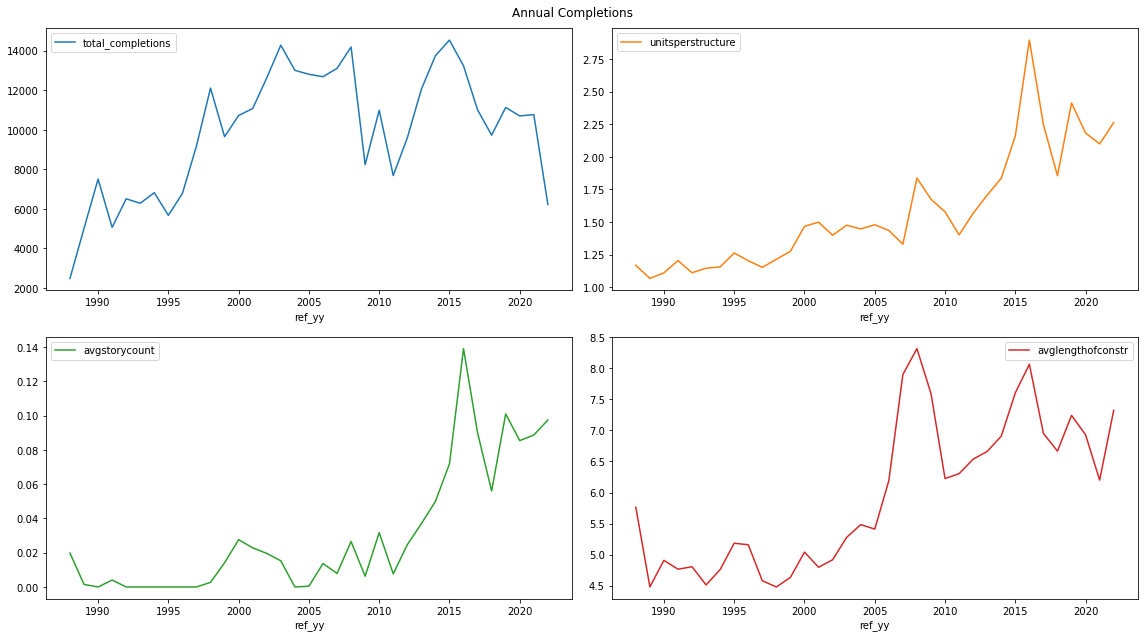

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,9))

comp_metro[['total_completions','unitsperstructure','avgstorycount','avglengthofconstr']].plot(ax= axes,subplots=True, title = 'Annual Completions')
plt.tight_layout()


<AxesSubplot:title={'center':'comp_per_10kpop'}, xlabel='ref_yy'>

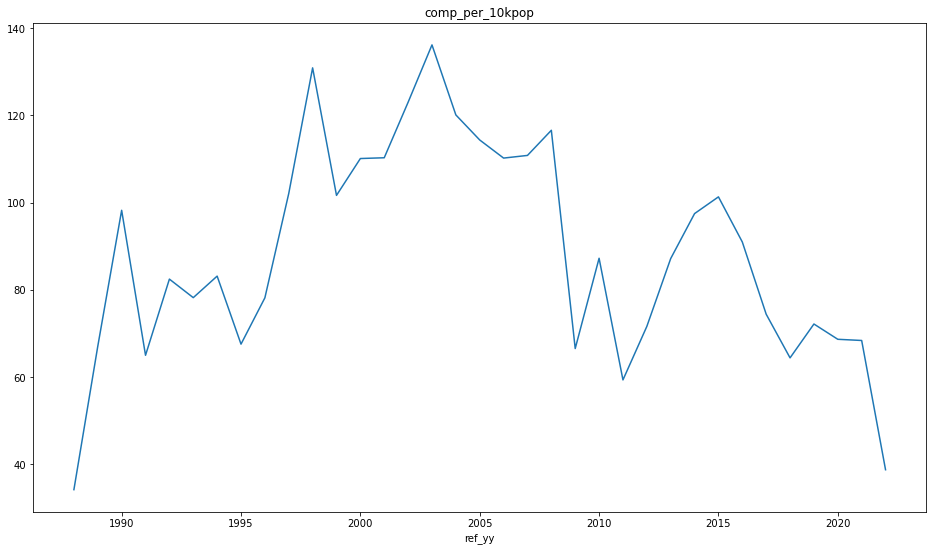

In [6]:
comp_metro['comp_per_10kpop'].plot(figsize=(16,9),title = 'comp_per_10kpop')

In [7]:
comp_metro_type=pd.read_csv('./Annual/comp_metro_type.csv')
comp_metro_type=comp_metro_type[comp_metro_type['metro']=='CALGARY']

In [8]:
comp_metro_type.columns

Index(['ref_yy', 'metcode', 'dweltype', 'mkttycd', 'date_pbi', 'metro',
       'total_completions', 'completions_no_accsuite', 'completions_accsuite',
       'num_structures', 'unitsperstructure', 'avgstorycount',
       'avglengthofconstr', 'bachelor_units', 'one_bedrooms', 'two_bedrooms',
       'three_bedrooms', 'four_bedrooms', 'tot_units',
       'total_avg_unitsize_sqm', 'total_avg_unitsize_sqft', 'total_avg_price',
       'total_min_price', 'total_max_price', 'reference_period_qq', 'ref_qq',
       'population', 'comp_per_10kpop'],
      dtype='object')

In [9]:
comp_metro_type=comp_metro_type.drop(columns=['metcode','date_pbi','reference_period_qq','ref_qq'])


In [10]:
comp_metro_type

,ref_yy,dweltype,mkttycd,metro,total_completions,completions_no_accsuite,completions_accsuite,num_structures,unitsperstructure,avgstorycount,...,three_bedrooms,four_bedrooms,tot_units,total_avg_unitsize_sqm,total_avg_unitsize_sqft,total_avg_price,total_min_price,total_max_price,population,comp_per_10kpop
2,1988,4,1,CALGARY,102,NaN,NaN,8,12.750000,0.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,724449.865,1.407965
35,1988,5,2,CALGARY,72,NaN,NaN,3,24.000000,13.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,724449.865,0.993858
46,1988,5,4,CALGARY,104,NaN,NaN,1,104.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,724449.865,1.435572
66,1988,1,1,CALGARY,2018,NaN,NaN,2018,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,724449.865,27.855620
103,1988,2,1,CALGARY,184,NaN,NaN,92,2.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,724449.865,2.539858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4185,2022,1,1,CALGARY,2178,NaN,NaN,2178,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1604005.000,13.578511
4189,2022,2,1,CALGARY,524,NaN,NaN,262,2.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1604005.000,3.266823
4190,2022,1,2,CALGARY,21,NaN,NaN,21,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1604005.000,0.130922
4197,2022,5,2,CALGARY,2179,2065.0,114.0,113,19.283186,1.823009,...,12.0,NaN,12.0,146.695,1579.010311,542450.0,532900.0,552000.0,1604005.000,13.584746


In [11]:
DWELTYPE={1:'Single-detached',
2:'Semi-detached',
4:'Row/Townhouse',
5:'Apartment'}


In [12]:
MKTTYCD	={1:'Homeowner',
2:'Rental',
3:'Condo',
4:'Coop'
}

In [13]:
comp_metro_type['dweltype']=comp_metro_type['dweltype'].map(DWELTYPE)
comp_metro_type['mkttycd']=comp_metro_type['mkttycd'].map(MKTTYCD)

In [14]:
comp_single = comp_metro_type[comp_metro_type['dweltype']=='Single-detached']
comp_semi = comp_metro_type[comp_metro_type['dweltype']=='Semi-detached']

comp_row = comp_metro_type[comp_metro_type['dweltype']=='Row/Townhouse']
comp_apt = comp_metro_type[comp_metro_type['dweltype']=='Apartment']



In [15]:
comp_single.pivot(index='ref_yy',columns='mkttycd')

dweltype                                      metro            \
mkttycd            Condo        Homeowner           Rental    Condo Homeowner   
ref_yy                                                                          
1988                 NaN  Single-detached              NaN      NaN   CALGARY   
1989                 NaN  Single-detached  Single-detached      NaN   CALGARY   
1990     Single-detached  Single-detached  Single-detached  CALGARY   CALGARY   
1991                 NaN  Single-detached              NaN      NaN   CALGARY   
1992                 NaN  Single-detached  Single-detached      NaN   CALGARY   
1993     Single-detached  Single-detached              NaN  CALGARY   CALGARY   
1994     Single-detached  Single-detached              NaN  CALGARY   CALGARY   
1995                 NaN  Single-detached              NaN      NaN   CALGARY   
1996     Single-detached  Single-detached              NaN  CALGARY   CALGARY   
1997     Single-detached  Single-detached              NaN  CALGARY   CALGARY   
1998     Single-detached  Single-detached              NaN  CALGARY   CALGARY   
1999     Single-detached  Single-detached              NaN  CALGARY   CALGARY   
2000     Single-detached  Single-detached  Single-detached  CALGARY   CALGARY   
2001     Single-detached  Single-detached  Single-detached  CALGARY   CALGARY   
2002     Single-detached  Single-detached              NaN  CALGARY   CALGARY   
2003     Single-detached  Single-detached              NaN  CALGARY   CALGARY   
2004     Single-detached  Single-detached              NaN  CALGARY   CALGARY   
2005     Single-detached  Single-detached              NaN  CALGARY   CALGARY   
2006     Single-detached  Single-detached              NaN  CALGARY   CALGARY   
2007     Single-detached  Single-detached              NaN  CALGARY   CALGARY   
2008     Single-detached  Single-detached              NaN  CALGARY   CALGARY   
2009                 NaN  Single-detached              NaN      NaN   CALGARY   
2010                 NaN  Single-detached              NaN      NaN   CALGARY   
2011                 NaN  Single-detached              NaN      NaN   CALGARY   
2012                 NaN  Single-detached              NaN      NaN   CALGARY   
2013     Single-detached  Single-detached              NaN  CALGARY   CALGARY   
2014     Single-detached  Single-detached              NaN  CALGARY   CALGARY   
2015                 NaN  Single-detached  Single-detached      NaN   CALGARY   
2016     Single-detached  Single-detached  Single-detached  CALGARY   CALGARY   
2017     Single-detached  Single-detached  Single-detached  CALGARY   CALGARY   
2018                 NaN  Single-detached  Single-detached      NaN   CALGARY   
2019     Single-detached  Single-detached  Single-detached  CALGARY   CALGARY   
2020                 NaN  Single-detached  Single-detached      NaN   CALGARY   
2021     Single-detached  Single-detached  Single-detached  CALGARY   CALGARY   
2022     Single-detached  Single-detached  Single-detached  CALGARY   CALGARY   

                 total_completions                  completions_no_accsuite  \
mkttycd   Rental             Condo Homeowner Rental                   Condo   
ref_yy                                                                        
1988         NaN               NaN    2018.0    NaN                     NaN   
1989     CALGARY               NaN    4497.0   67.0                     NaN   
1990     CALGARY               2.0    6410.0   20.0                     NaN   
1991         NaN               NaN    4005.0    NaN                     NaN   
1992     CALGARY               NaN    5561.0    3.0                     NaN   
1993         NaN              16.0    5147.0    NaN                     NaN   
1994         NaN               1.0    5583.0    NaN                     NaN   
1995         NaN               NaN    4222.0    NaN                     NaN   
1996         NaN               3.0    5347.0    NaN                 

In [16]:
comp_single

,ref_yy,dweltype,mkttycd,metro,total_completions,completions_no_accsuite,completions_accsuite,num_structures,unitsperstructure,avgstorycount,...,three_bedrooms,four_bedrooms,tot_units,total_avg_unitsize_sqm,total_avg_unitsize_sqft,total_avg_price,total_min_price,total_max_price,population,comp_per_10kpop
66,1988,Single-detached,Homeowner,CALGARY,2018,NaN,NaN,2018,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,724449.865,27.855620
119,1989,Single-detached,Homeowner,CALGARY,4497,NaN,NaN,4497,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,747414.603,60.167409
164,1989,Single-detached,Rental,CALGARY,67,NaN,NaN,67,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,747414.603,0.896423
293,1990,Single-detached,Homeowner,CALGARY,6410,NaN,NaN,6410,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764404.198,83.856159
331,1990,Single-detached,Condo,CALGARY,2,NaN,NaN,2,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764404.198,0.026164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,2021,Single-detached,Rental,CALGARY,10,NaN,NaN,10,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1574967.070,0.063493
4106,2021,Single-detached,Condo,CALGARY,5,NaN,NaN,5,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1574967.070,0.031747
4185,2022,Single-detached,Homeowner,CALGARY,2178,NaN,NaN,2178,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1604005.000,13.578511
4190,2022,Single-detached,Rental,CALGARY,21,NaN,NaN,21,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1604005.000,0.130922


In [18]:
starts_ct_q = pd.read_csv('./Quarterly/starts_ct_type.csv')
starts_ct_q=starts_ct_q[starts_ct_q['metro']=='CALGARY']
starts_ct_q['full_ct']=starts_ct_q['full_ct'].map('{:.2f}'.format)
starts_ct_q['full_ct']=starts_ct_q['full_ct'].astype(str)

In [19]:
starts_ct_q['quarter']=starts_ct_q['reference_period_qq'].str.slice(start=-1)

In [20]:
starts_ct_q['year'] = starts_ct_q['reference_period_qq'].str.slice(stop=4)

In [21]:
starts_ct_q['dweltype']=starts_ct_q['dweltype'].map(DWELTYPE)
starts_ct_q['mkttycd']=starts_ct_q['mkttycd'].map(MKTTYCD)

In [22]:
starts_ct_q=starts_ct_q.drop(columns=['metcode','date_pbi','reference_period_qq','ref_qq'])


In [23]:
starts_ct_q=starts_ct_q[(starts_ct_q['quarter']=='1') | (starts_ct_q['quarter']=='2')]

In [24]:
ct_rental = starts_ct_q[(starts_ct_q['dweltype']=='Apartment') & (starts_ct_q['mkttycd']=='Rental')]

In [25]:
merged_starts = cal_ct.merge(ct_rental[ct_rental['year']=='2022'].groupby('full_ct').sum()[['total_starts','num_structures']],left_on='CTUID',right_on='full_ct')
merged_starts=merged_starts.to_crs(epsg='3857')

NameError: name 'cal_ct' is not defined

In [102]:
top_five = merged_starts.sort_values(by="total_starts",ascending=False)[:5]

In [105]:
top_five

,CTUID,CTNAME,PRUID,PRNAME,CMAUID,CMAPUID,CMANAME,CMATYPE,geometry,total_starts,num_structures
42,8250017.03,0017.03,48,Alberta,825,48825,Calgary,B,"POLYGON ((-12707443.068 6622882.616, -12707465...",278,1
18,8250013.00,0013.00,48,Alberta,825,48825,Calgary,B,"POLYGON ((-12698560.692 6617711.765, -12698562...",226,1
16,8250001.31,0001.31,48,Alberta,825,48825,Calgary,B,"POLYGON ((-12697873.790 6602867.485, -12697768...",199,27
41,8250002.21,0002.21,48,Alberta,825,48825,Calgary,B,"POLYGON ((-12679959.731 6596630.938, -12679960...",127,107
35,8250046.01,0046.01,48,Alberta,825,48825,Calgary,B,"POLYGON ((-12699758.470 6630188.122, -12699743...",106,1


SSLError: HTTPSConnectionPool(host='a.tile.openstreetmap.org', port=443): Max retries exceeded with url: /11/372/683.png (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:997)')))

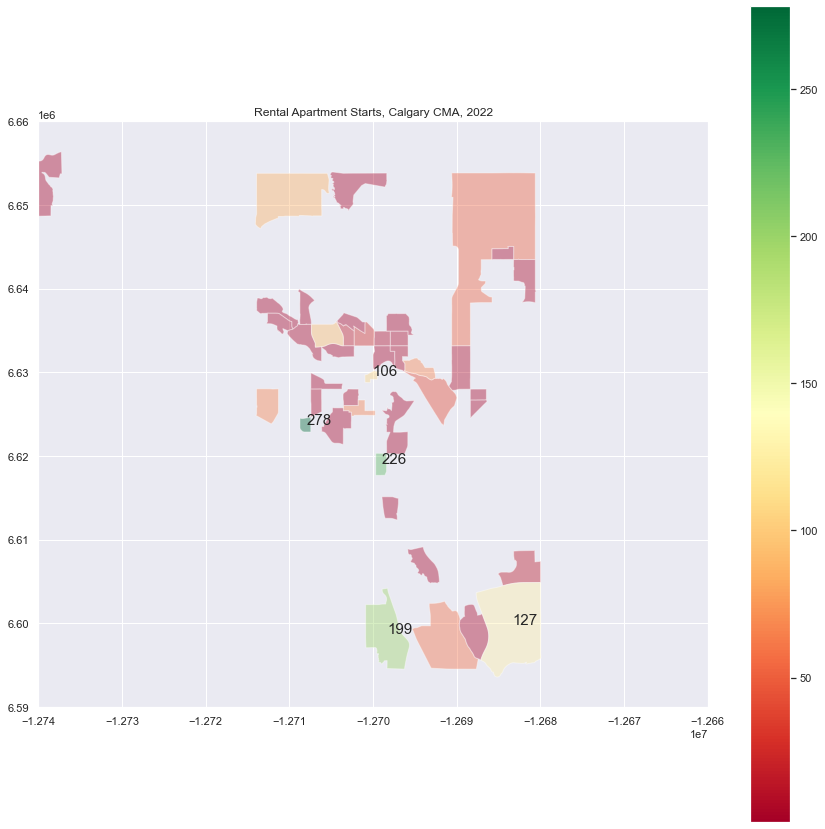

In [108]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.set_title('Rental Apartment Starts, Calgary CMA, 2022')
merged_starts.to_crs(epsg='3857').plot(column='total_starts',cmap='RdYlGn',edgecolor='white', ax=ax,alpha = 0.4, legend = True)
for x, y, label in zip(top_five.geometry.centroid.x, top_five.geometry.centroid.y, top_five['total_starts']):
    ax.annotate("{:,.0f}".format(label), xy=(x, y), xytext=(1, 1), textcoords="offset points",fontsize = 15)
minx=-1.274*10**7
maxx=-1.266*10**7
miny=6.59*10**6
maxy=6.66*10**6
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax ,source=cx.providers.OpenStreetMap.Mapnik)
cx.add_basemap(ax ,source=cx.providers.Stamen.TonerLabels)
plt.savefig('rental_starts.png',facecolor='white',transparent=False,dpi=300)

In [99]:
ct_rental[ct_rental['year']=='2022'].groupby('full_ct').sum()[['total_starts','num_structures']]

,total_starts,num_structures
full_ct,,
8250001.06,1,1
8250001.31,199,27
8250001.34,57,47
8250002.20,12,12
8250002.21,127,107
8250002.23,3,3
8250005.00,1,1
8250013.00,226,1
8250017.03,278,1
